https://github.com/KeremTurgutlu/dicom-contour/blob/master/tutorial.ipynb

In [47]:
from dicom_contour.contour import *

In [48]:
# class RTStructExtractor:

#     def get_contour_file(path):
#         """
#         Get contour file from a given path by searching for ROIContourSequence 
#         inside dicom data structure.
#         More information on ROIContourSequence available here:
#         http://dicom.nema.org/medical/dicom/2016c/output/chtml/part03/sect_C.8.8.6.html

#         Inputs:
#                 path (str): path of the the directory that has DICOM files in it, e.g. folder of a single patient
#         Return:
#             contour_file (str): name of the file with the contour
#         """
#         # handle `/` missing
#         if path[-1] != '/': path += '/'
#         # get .dcm contour file
#         fpaths = [path + f for f in os.listdir(path) if '.dcm' in f]
#         n = 0
#         for fpath in fpaths:
#             f = dicom.read_file(fpath)
#             if 'ROIContourSequence' in dir(f):
#                 contour_file = fpath.split('/')[-1]
#                 n += 1
#         if n > 1: warnings.warn("There are multiple files, returning the last one!")
#         return contour_file

#     def cfile2pixels(file, path, ROIContourSeq=10):
#         """
#         Given a contour file and path of related images return pixel arrays for contours
#         and their corresponding images.
#         Inputs
#             file: filename of contour
#             path: path that has contour and image files
#             ROIContourSeq: tells which sequence of contouring to use default 0 (RTV)
#         Return
#             contour_iamge_arrays: A list which have pairs of img_arr and contour_arr for a given contour file
#         """
#         # handle `/` missing
#         if path[-1] != '/': path += '/'
#         f = dicom.read_file(path + file)
#         # index 0 means that we are getting RTV information
#         RTV = f.ROIContourSequence[ROIContourSeq]
#         # get contour datasets in a list
#         contours = [contour for contour in RTV.ContourSequence]
#         img_contour_arrays = [coord2pixels(cdata, path) for cdata in contours]
#         return img_contour_arrays

#     def slice_order(path):
#         """
#         Takes path of directory that has the DICOM images and returns
#         a ordered list that has ordered filenames
#         Inputs
#             path: path that has .dcm images
#         Returns
#             ordered_slices: ordered tuples of filename and z-position
#         """
#         # handle `/` missing
#         if path[-1] != '/': path += '/'
#         slices = []
#         for s in os.listdir(path):
#             try:
#                 f = dicom.read_file(path + '/' + s)
#                 f.pixel_array  # to ensure not to read contour file
#                 slices.append(f)
#             except:
#                 continue

#         slice_dict = {s.SOPInstanceUID: s.ImagePositionPatient[-1] for s in slices}
#         ordered_slices = sorted(slice_dict.items(), key=operator.itemgetter(1))
#         return ordered_slices

#     def get_data(path, index):
#         """
#         Generate image array and contour array
#         Inputs:
#             path (str): path of the the directory that has DICOM files in it
#             contour_dict (dict): dictionary created by get_contour_dict
#             index (int): index of the desired ROISequence
#         Returns:
#             images and contours np.arrays
#         """
#         images = []
#         contours = []
#         # handle `/` missing
#         if path[-1] != '/': path += '/'
#         # get contour file
#         contour_file = get_contour_file(path)
#         # get slice orders
#         ordered_slices = slice_order(path)
#         # get contour dict
#         contour_dict = get_contour_dict(contour_file, path, index)

#         for k,v in ordered_slices:
#             # get data from contour dict
#             if k in contour_dict:
#                 images.append(contour_dict[k][0])
#                 contours.append(contour_dict[k][1])
#             # get data from dicom.read_file
#             else:
#                 img_arr = dicom.read_file(path + k + '.dcm').pixel_array
#                 contour_arr = np.zeros_like(img_arr)
#                 images.append(img_arr)
#                 contours.append(contour_arr)

#         return np.array(images), np.array(contours)

In [49]:
# example patient path
path ='/Users/wangyangwu/Documents/Maastro/NeuralNets/sample2/P0439C0006I2866736/CT/1.3.6.1.4.1.32722.228.6.55901622014571750448587355595101479465'

In [50]:
# let's store our dicom file for the rest of the introduction
contour_file = get_contour_file(path)

In [51]:
contour_data = dicom.read_file(path + '/' + contour_file)

In [52]:
# get the contour file for this patient
get_contour_file(path)

'1.3.6.1.4.1.32722.228.6.332203879635776959415089458375606237432.dcm'

In [53]:
get_roi_names(contour_data)

['mid_1',
 'mid_0',
 'mid_2',
 'isogem',
 'Dmax',
 'CTV1-hals',
 'Ring05_CTVcaud',
 'Ring05_CTVcran',
 'CTVnsum_5_cran2',
 'CTVnsum_5_caud',
 'CTVnsum_5_cran',
 'Rail1A',
 'Rail2A',
 'External_grootFOV',
 'Skin',
 'MedEnv_inCTV_7',
 'Esophagus-CTV_3',
 'Lung_R-CTV_3',
 'Lung_L-CTV_3',
 'Heart-CTV_5',
 'CTV1',
 'CTVp1_5_3',
 'Lung_L',
 'Lung_R',
 'Esophagus',
 'SpinalCord',
 'GTVnsum',
 'CTVnsum_5',
 'Heart',
 'MediastEnvelop',
 'MedEnv_5',
 'BracPlex_L',
 'Lungs-GTV',
 'SpinalCord_3',
 'External',
 'CTVp1_5',
 'GTVp1',
 'BODY']

In [54]:
# get all image-contour array pairs
contour_arrays = cfile2pixels(file=contour_file, path=path, ROIContourSeq=32)

In [55]:
# get first image - contour array
first_image, first_contour, img_id = contour_arrays[32]

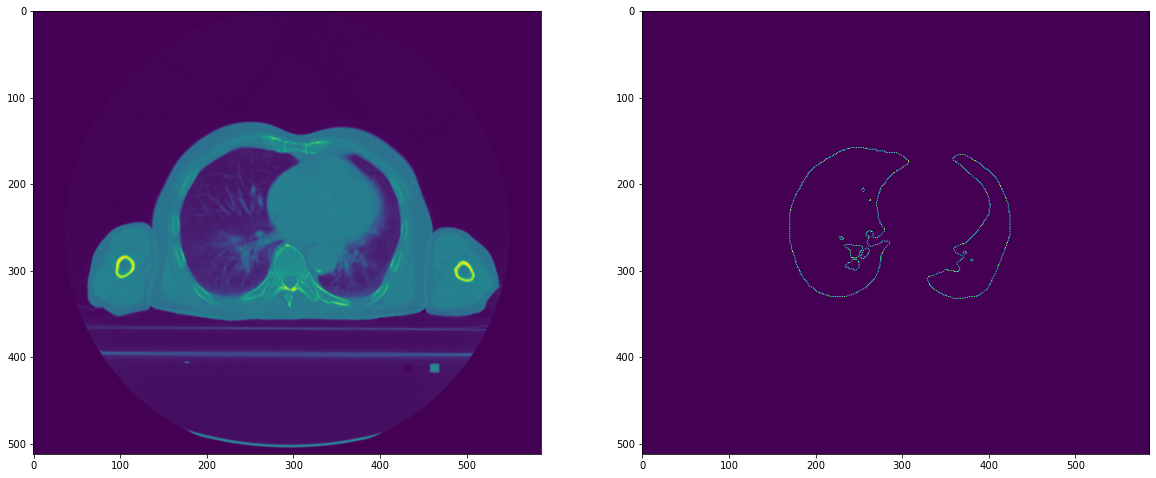

In [56]:
# show an example
plt.figure(figsize=(20, 10))
plt.subplot(1,2,1)
plt.imshow(first_image)
plt.subplot(1,2,2)
plt.imshow(first_contour)

In [57]:
# ordered files
ordered_slices = slice_order(path)
ordered_slices[:5]

[('1.3.6.1.4.1.32722.228.6.151058875740967631795723596592736472544', "-776.5"),
 ('1.3.6.1.4.1.32722.228.6.131894717145203974960544119866599202881', "-773.5"),
 ('1.3.6.1.4.1.32722.228.6.238146650655522810036680853992107926906', "-770.5"),
 ('1.3.6.1.4.1.32722.228.6.289742489145196093785642472171732440091', "-767.5"),
 ('1.3.6.1.4.1.32722.228.6.193254447269811684622194883927959166763', "-764.5")]

In [58]:
contour_dict = get_contour_dict(contour_file, path, 32)

In [59]:
images, contours = get_data(path, index=32)

In [60]:
images.shape, contours.shape

((166, 512, 586), (166, 512, 586))

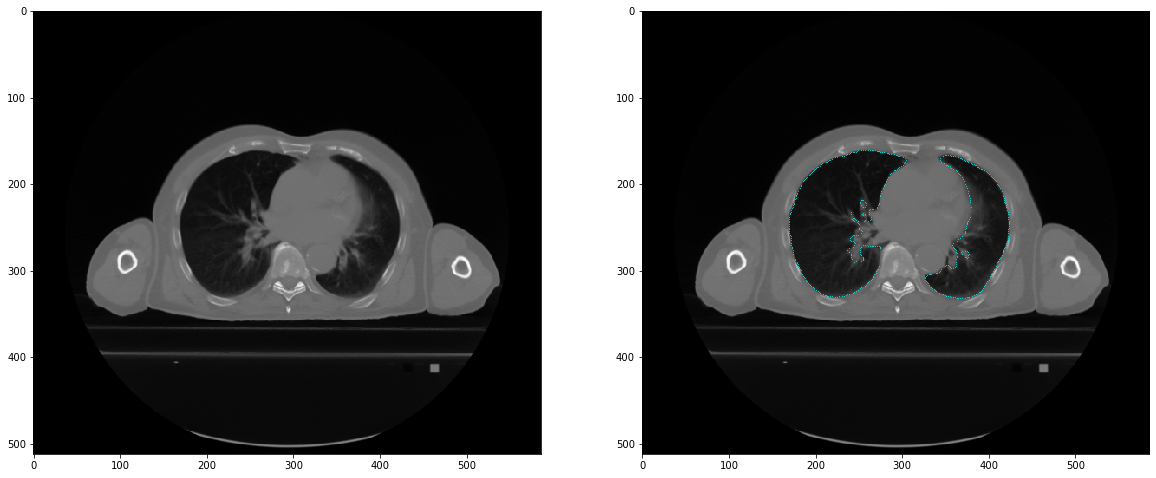

In [61]:
for img_arr, contour_arr in zip(images[58:59], contours[58:59]):
    plot2dcontour(img_arr, contour_arr)

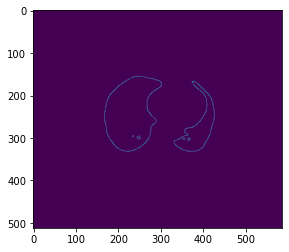

In [62]:
cntr = contours[50]
plt.imshow(cntr)

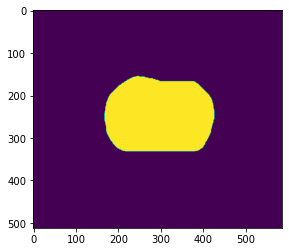

In [63]:
filled_cntr = fill_contour(cntr)
plt.imshow(filled_cntr)

In [64]:
images_3d = np.stack([images[i] for i in range(images.shape[0])])

In [65]:
contour_slices = [contours[i] for i in range(contours.shape[0])]
contour_3d = [fill_contour(c) if c.max()==1 else c for c in contour_slices]

In [66]:
contour_3d = np.stack(contour_3d)

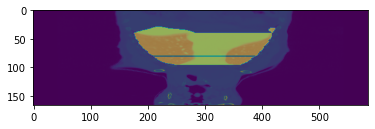

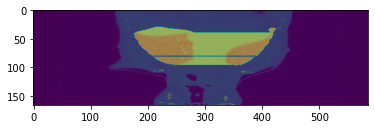

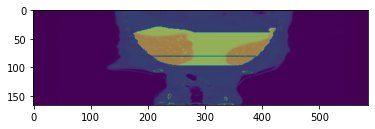

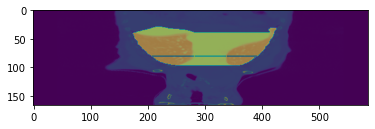

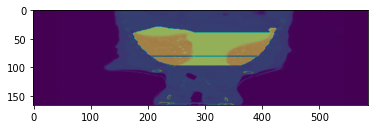

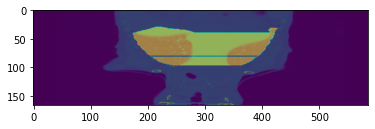

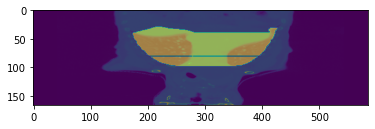

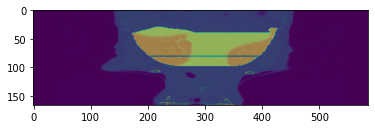

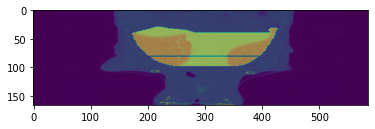

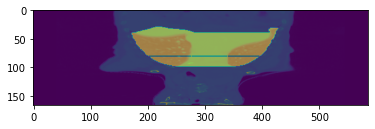

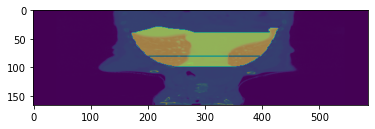

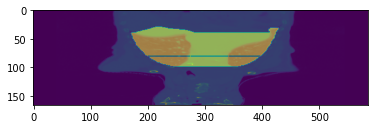

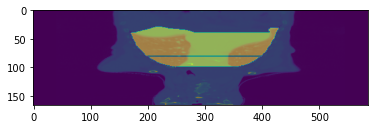

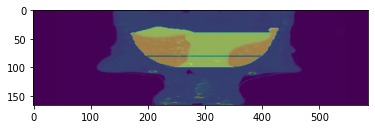

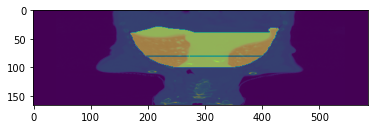

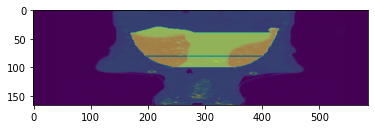

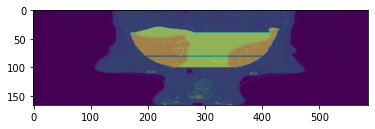

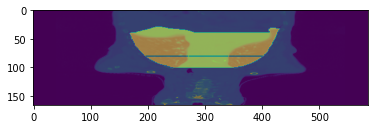

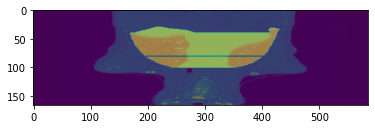

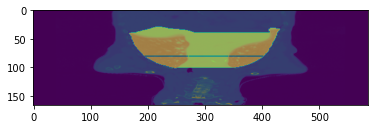

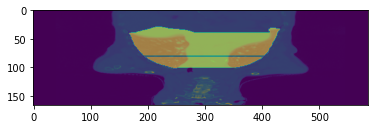

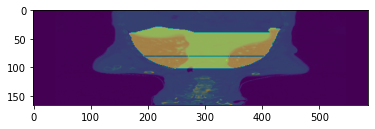

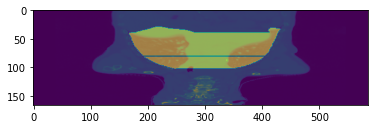

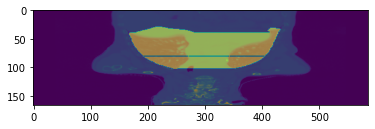

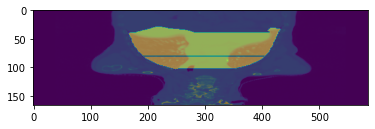

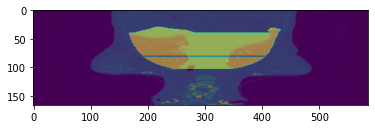

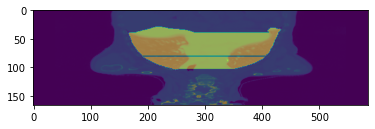

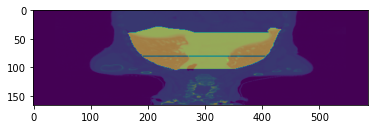

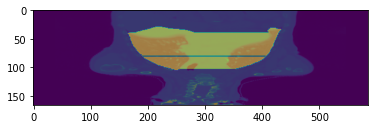

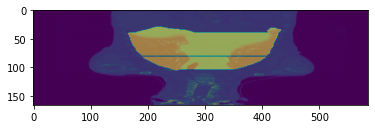

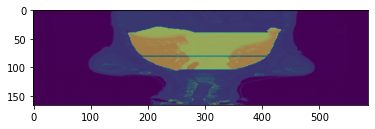

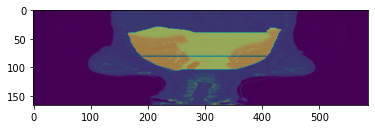

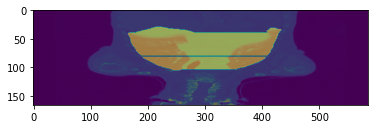

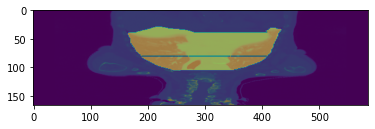

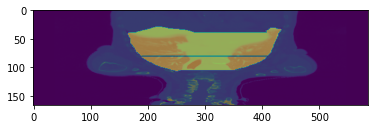

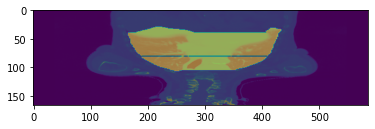

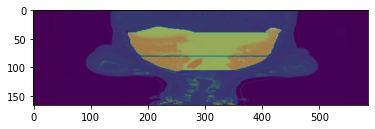

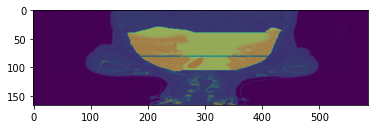

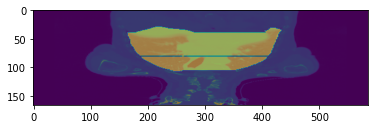

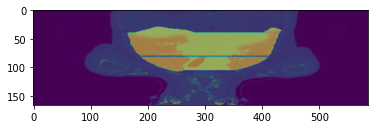

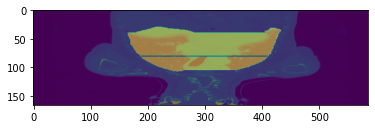

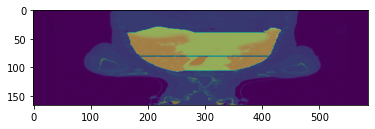

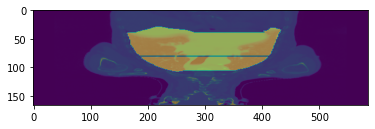

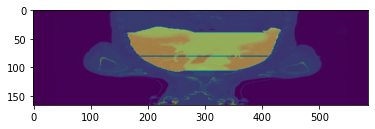

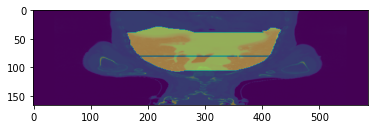

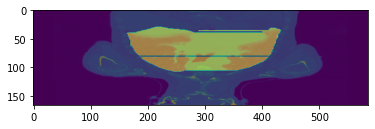

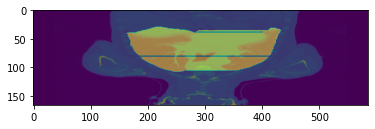

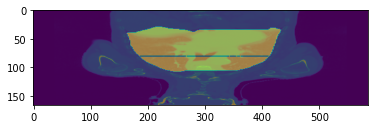

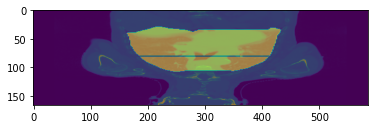

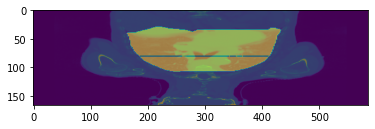

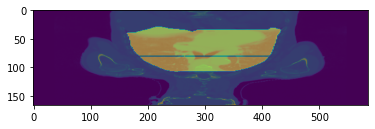

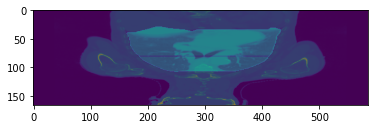

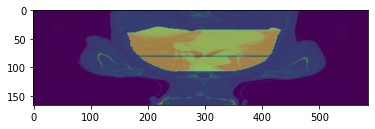

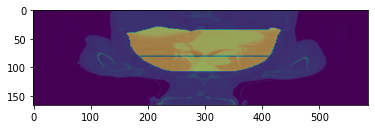

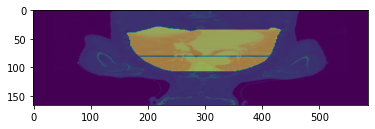

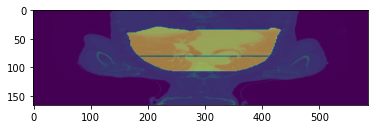

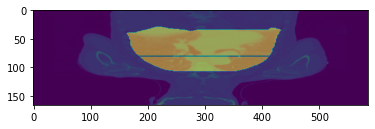

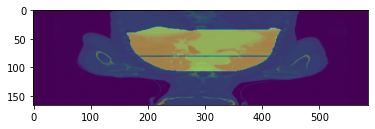

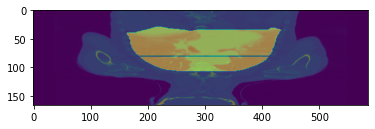

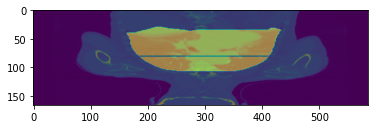

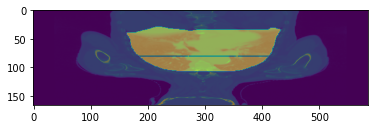

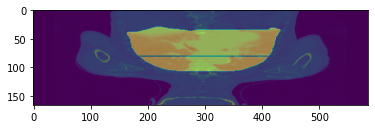

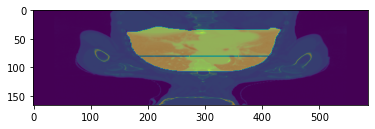

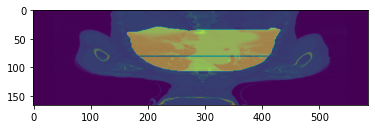

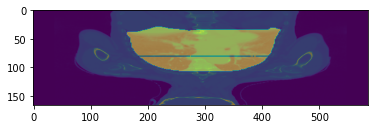

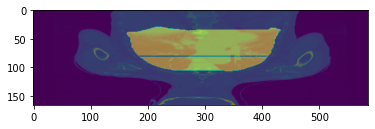

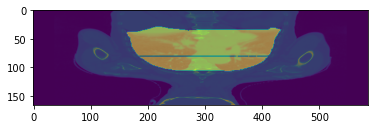

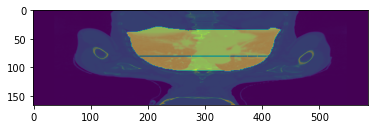

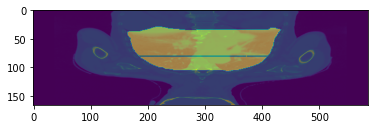

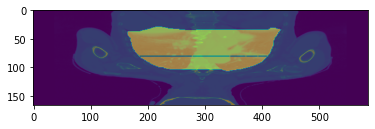

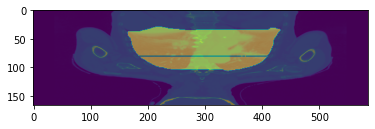

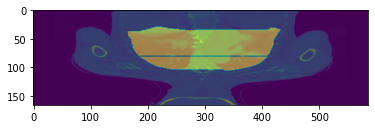

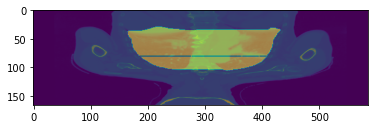

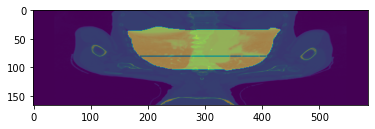

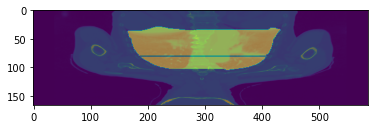

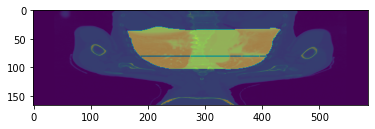

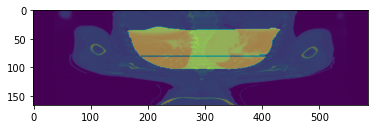

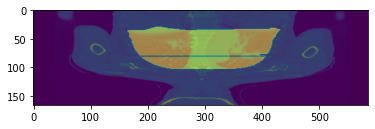

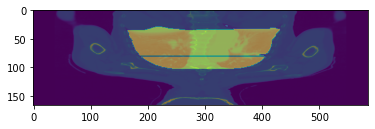

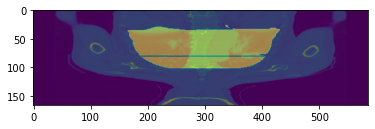

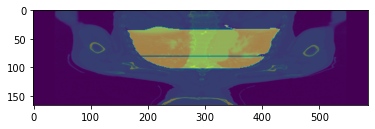

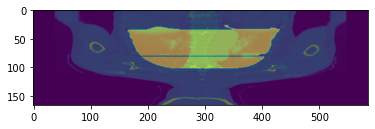

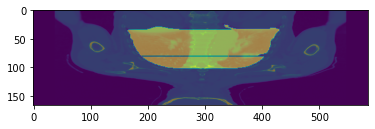

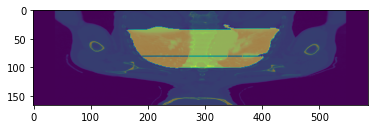

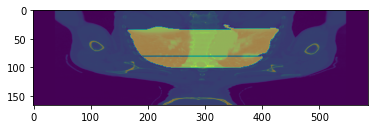

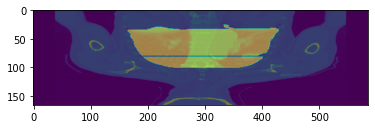

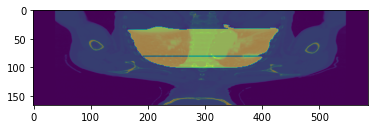

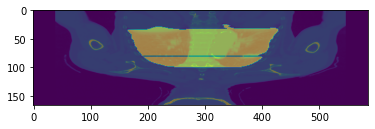

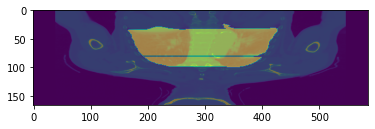

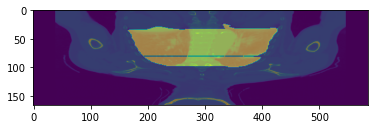

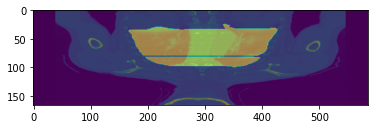

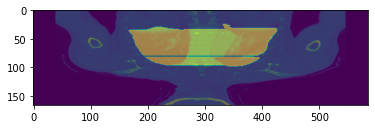

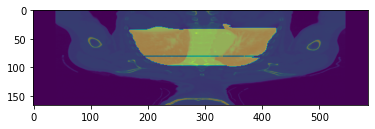

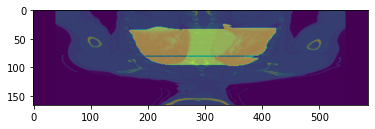

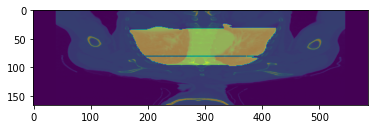

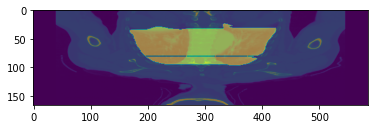

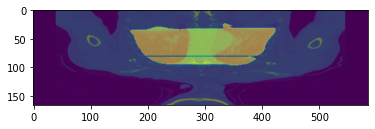

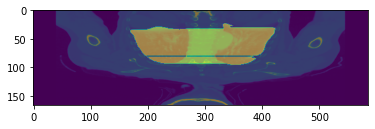

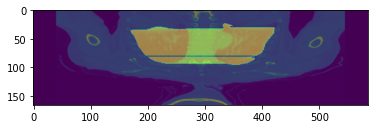

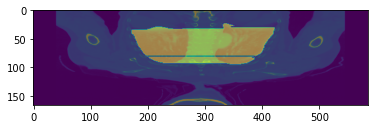

In [46]:
for i in range(200,300):
    fig = plt.figure(frameon=False)
    img1 = plt.imshow(contour_3d[:,i,:])
    img2 = plt.imshow(images_3d[:,i,:],alpha=0.5)
    plt.show()